<a href="https://colab.research.google.com/github/antonychackotc/project-4/blob/main/4m_2nd_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2nd-preprocessing-steps**

# **Encoding Based**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/outlier-treated.csv')
df.head()

,Unnamed: 0,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition,JobSatisfaction,EnvironmentSatisfaction,JobInvolvement,WorkLifeBalance,OverTime,NumCompaniesWorked
0,0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,2.197225,1.945910,0.000000,Yes,4,2,3,1,Yes,8
1,2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2.079442,0.000000,0.000000,Yes,3,4,2,3,Yes,6
2,3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,2.197225,2.197225,1.386294,No,3,4,3,3,Yes,1
3,4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1.945910,1.098612,1.098612,No,2,1,3,3,No,9
4,5,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,2.197225,2.079442,1.386294,No,4,4,3,2,No,0


# **Encoding Steps - Sperate Numerical and Categorical Columns**

In [ ]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

print("Numerical Columns:", numerical_cols.tolist())
print("Categorical Columns:", categorical_cols.tolist())

Numerical Columns: ['Unnamed: 0', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'PerformanceRating', 'YearsInCurrentRole', 'YearsWithCurrManager', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'NumCompaniesWorked']
Categorical Columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'Over18', 'JobRole', 'Attrition', 'OverTime']


In [ ]:
categorical_cols.shape

(9,)

In [ ]:
categorical_cols.tolist()

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'MaritalStatus',
 'Over18',
 'JobRole',
 'Attrition',
 'OverTime']

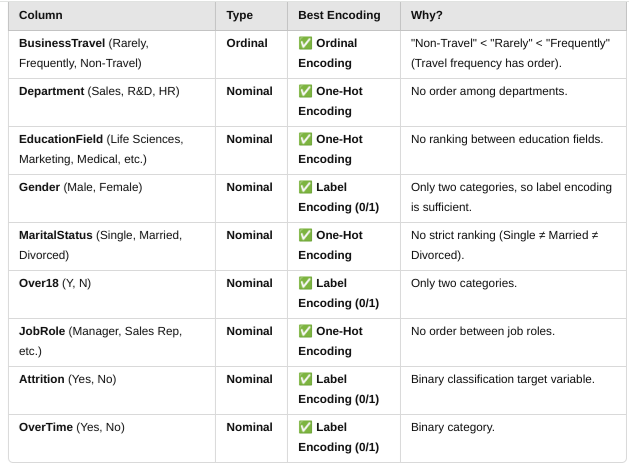

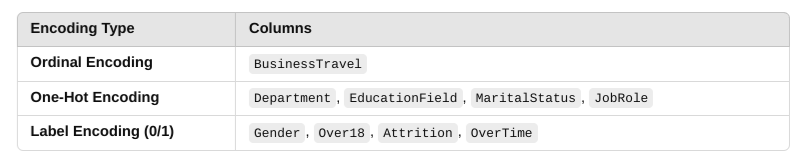

# **1) Ordinal Encoding**

In [ ]:
df['BusinessTravel'].value_counts()

,count
BusinessTravel,
Travel_Rarely,889
Travel_Frequently,231
Non-Travel,124


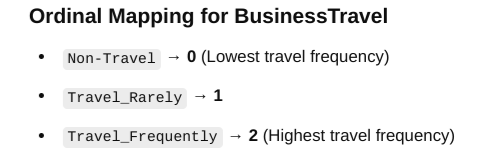

In [ ]:
# Define the ordinal mapping
business_travel_mapping = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}

# Apply the mapping to the BusinessTravel column
df['BusinessTravel'] = df['BusinessTravel'].map(business_travel_mapping)

# Check if encoding is successful
df['BusinessTravel'].value_counts()

,count
BusinessTravel,
1,889
2,231
0,124


In [ ]:
#####################################################################################

# **2) One-Hot Encoding**

In [ ]:
df['Department'].value_counts()

,count
Department,
Research & Development,805
Sales,385
Human Resources,54


In [ ]:
df['EducationField'].value_counts()

,count
EducationField,
Life Sciences,510
Medical,389
Marketing,138
Technical Degree,115
Other,68
Human Resources,24


In [ ]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,567
Single,398
Divorced,279


In [ ]:
df['JobRole'].value_counts()

,count
JobRole,
Sales Executive,285
Research Scientist,243
Laboratory Technician,217
Manufacturing Director,118
Healthcare Representative,111
Manager,82
Research Director,72
Sales Representative,71
Human Resources,45


# **JobRole Dataset has 9 unique value to avoid high cause of dimensionality use Freqency Encoding**

In [ ]:
df['JobRole_FreqEncoded'] = df['JobRole'].map(df['JobRole'].value_counts())

In [ ]:
df['JobRole_FreqEncoded'].value_counts()

,count
JobRole_FreqEncoded,
285,285
243,243
217,217
118,118
111,111
82,82
72,72
71,71
45,45


In [ ]:
df['JobRole'].value_counts()

,count
JobRole,
Sales Executive,285
Research Scientist,243
Laboratory Technician,217
Manufacturing Director,118
Healthcare Representative,111
Manager,82
Research Director,72
Sales Representative,71
Human Resources,45


In [ ]:
########################################################################################

In [ ]:
df['EducationField_FreqEncoded'] = df['EducationField'].map(df['EducationField'].value_counts())

In [ ]:
df['EducationField_FreqEncoded'].value_counts()

,count
EducationField_FreqEncoded,
510,510
389,389
138,138
115,115
68,68
24,24


In [ ]:
df['EducationField'].value_counts()

,count
EducationField,
Life Sciences,510
Medical,389
Marketing,138
Technical Degree,115
Other,68
Human Resources,24


In [ ]:
###########################################################################################

In [ ]:
# df['Department']
# df['MaritalStatus']

df_encoded = pd.get_dummies(df, columns=['Department', 'MaritalStatus'], drop_first=True)

In [ ]:
df['Department'].value_counts()

,count
Department,
Research & Development,805
Sales,385
Human Resources,54


In [ ]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,567
Single,398
Divorced,279


In [ ]:
df_encoded.head()

,Unnamed: 0,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Gender,...,JobInvolvement,WorkLifeBalance,OverTime,NumCompaniesWorked,JobRole_FreqEncoded,EducationField_FreqEncoded,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,0,41,1,1102,1,2,Life Sciences,1,1,Female,...,3,1,Yes,8,285,510,False,True,False,True
1,2,37,1,1373,2,2,Other,1,4,Male,...,2,3,Yes,6,217,68,True,False,False,True
2,3,33,2,1392,3,4,Life Sciences,1,5,Female,...,3,3,Yes,1,243,510,True,False,True,False
3,4,27,1,591,2,1,Medical,1,7,Male,...,3,3,No,9,217,389,True,False,True,False
4,5,32,2,1005,2,2,Life Sciences,1,8,Male,...,3,2,No,0,217,510,True,False,False,True


In [ ]:
df_encoded.shape

(1244, 40)

In [ ]:
############################################################################################################

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,750
Female,494


In [ ]:
df['Over18']

,Over18
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
1239,Y
1240,Y
1241,Y
1242,Y


In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
No,1044
Yes,200


In [ ]:
df['OverTime'].value_counts()

,count
OverTime,
No,893
Yes,351


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the columns to encode
cols_to_encode = ['Gender', 'Over18', 'Attrition', 'OverTime']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each column
for col in cols_to_encode:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Display the updated dataframe
df_encoded.head()

,Unnamed: 0,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Gender,...,JobInvolvement,WorkLifeBalance,OverTime,NumCompaniesWorked,JobRole_FreqEncoded,EducationField_FreqEncoded,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,0,41,1,1102,1,2,Life Sciences,1,1,0,...,3,1,1,8,285,510,False,True,False,True
1,2,37,1,1373,2,2,Other,1,4,1,...,2,3,1,6,217,68,True,False,False,True
2,3,33,2,1392,3,4,Life Sciences,1,5,0,...,3,3,1,1,243,510,True,False,True,False
3,4,27,1,591,2,1,Medical,1,7,1,...,3,3,0,9,217,389,True,False,True,False
4,5,32,2,1005,2,2,Life Sciences,1,8,1,...,3,2,0,0,217,510,True,False,False,True


In [ ]:
df_encoded['Over18'].value_counts()

,count
Over18,
0,1244


In [ ]:
######################################################################################

In [ ]:
df_encoded.to_csv('encode-employee.csv')